In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

import numpy as np
import scipy.fft
import glob

import scipy.signal

from utils import style
style.make_style()

Noise data from 4 timeseries

In [2]:
data_noise = glob.glob('../data/noise/**')


d = np.array([np.loadtxt(data, skiprows=24) for data in data_noise])
d_avg = np.concatenate(d)

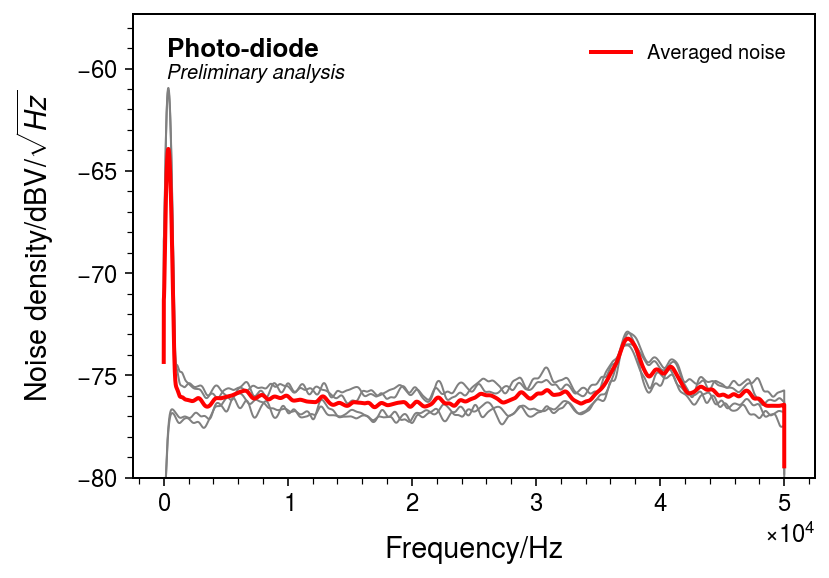

In [25]:
f, nsd = scipy.signal.welch(d_avg, 1e5, nfft=1e5)
nsd = 20 * np.log10(np.sqrt(nsd))
plt.plot(f,nsd, 'r', label='Averaged noise', zorder=10)
for di in d:
    f, nsd = scipy.signal.welch(di, 1e5, nfft=1e5)
    nsd = 20 * np.log10(np.sqrt(nsd))
    plt.plot(f,nsd, 'gray', lw=1)
plt.xlabel('Frequency/Hz')
plt.ylabel('Noise density/$\mathrm{dBV}/\sqrt{Hz}$')
hep.label.exp_text('Photo-diode', 'Preliminary analysis', loc=2, italic=(False, True))
plt.legend()
plt.ylim(-80,-57.33)
# plt.xlim(0, 10_000)
plt.savefig('../figures/noise_nds.pdf', bbox_inches='tight')